<a href="https://colab.research.google.com/github/Ramya0694/algos/blob/master/notebooks/Author_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict
from itertools import combinations

URL = 'http://microct.lbl.gov/pubs'
page = requests.get(URL)

In [ ]:
bs = BeautifulSoup(page.content)
table = bs.find(lambda tag: tag.name=='table' and tag.has_attr('id') and tag['id']=="goog-ws-list-table") 
rows = table.findAll(lambda tag: tag.name=='tr')

In [ ]:
title = []
authors = []
for row in rows[1:]:
  tds = row.findAll(lambda tag: tag.name=='td')
  title.append(tds[0].get_text())
  authors.append(tds[1].get_text())

In [ ]:
publications = pd.DataFrame({'title':title, 'author': authors})

In [ ]:
# auth_dict = dict()
# id = 0

def get_auths(input):
  global auth_dict
  global id
  elements = input[:len(input)-4].split(",")
  names = []
  for element in elements:
    # if element not in auth_dict:
      element = element.strip()
      if(element.startswith("and")):
        element = element[3:]
        element = element.strip()
      # auth_dict[element] = id
      # id += 1
      names.append(element)

  return names

publications['author_list'] = publications['author'].apply(get_auths)

In [ ]:
auth_dict = dict()
id = 0

for element_list in publications['author_list']:
  for element in element_list:
    if element not in auth_dict:
      auth_dict[element] = id
      id += 1

# sorted(auth_dict.items(), key = lambda x: x[1])

In [ ]:
def get_ids(names):
  res = []
  for name in names:
    res.append(auth_dict[name])
  return res

publications['ids'] = publications['author_list'].apply(get_ids)

In [ ]:
edges = []

for entity in publications['ids']:
  combs = list(combinations(entity, 2)) 
  edges.extend(combs)

len(edges)

4386

In [ ]:
count = 0

def get_matched(input):
  global count
  if 439 in input:
    count += 1
    return True
  return False

publications['exists'] = publications['ids'].apply(get_matched)

In [ ]:
list(publications[publications['exists'] == True]['title'])

['Reduced diaphyseal strength associated with high intracortical vascular porosity within long bones of children with osteogenesis imperfecta\xa0',
 'A new approach to foam-lined indirect-drive NIF ignition targets\xa0',
 ' Geophysical monitoring and reactive transport modeling of ureolytically-driven calcium carbonate precipitation\xa0',
 'The passivation of calcite by acid mine water. Column experiments with ferric sulfate and ferric chloride solutions at pH 2\xa0',
 'Fabrication and in vitro characterization of three-dimensional organic/inorganic scaffolds by robocasting\xa0']

# Graphviz

In [ ]:
# !pip install graphviz

In [ ]:
import networkx as nx
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine, EdgesAndLinkedNodes, NodesAndLinkedEdges, LabelSet
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8, Reds256, Blues256
from bokeh.transform import linear_cmap
from networkx.algorithms import community

G = nx.Graph()

for i in range(len(auth_dict.keys())):
  G.add_node(i)

G.add_edges_from(edges)

In [ ]:
reverse_dict = {}

for key in auth_dict:
  reverse_dict[auth_dict[key]] = key

len(reverse_dict.keys())

747

In [ ]:
auth_dict

{'': 532,
 '1 Lauren Rotman': 392,
 'A Doran': 53,
 'A Hexemer': 324,
 'A Scholl': 51,
 'A.': 660,
 'A. Clark': 559,
 'A. MacDowell': 605,
 'A. Schirotzek a': 609,
 'A.A. Chernov': 482,
 'A.A. MacDowell': 579,
 'A.E. Porter': 583,
 'A.L. Seyfferth': 565,
 'A.P. Kirchheim': 655,
 'A.P. Tom': 713,
 'A.P. Tomsia and R.O. Ritc': 615,
 'A.V. Ha': 494,
 'AA MacDowell': 56,
 'AA Macdowell': 124,
 'AJ Curtin': 505,
 'AT Young': 55,
 'AZ Weber': 223,
 'Aaron Treger': 48,
 'Abdel Haboub': 272,
 'Abdelmoula Haboub': 181,
 'Adam Z We': 232,
 'Adam Z Weber': 122,
 'Adriana Paluszny': 431,
 'Adrien Lamibrac': 236,
 'Adwait A Trikanad': 32,
 'Ajo-Franklin': 538,
 'Alastair A MacDow': 50,
 'Alastair A MacDowell': 150,
 'Alastair MacDow': 138,
 'Alastair MacDowell': 234,
 'Alastair McDowell': 360,
 'Alessandra Carriero': 430,
 'Alexander Hexe': 97,
 'Alexander Hexemer': 245,
 'Alexey Serov': 160,
 'Alexis Navarre-Sitchler': 623,
 'Alexis Rochet': 103,
 'Ali Miserez': 178,
 'Alliston': 650,
 "Alpha T N'

In [ ]:
degrees = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degrees)
nx.set_node_attributes(G, name='author', values=reverse_dict)

In [ ]:
output_notebook()

In [ ]:
modularity_class = {}
modularity_color = {}

sub_graphs = nx.connected_components(G)

for community_number,community in enumerate(sub_graphs):
  for name in list(community):
    modularity_class[name] = community_number
    modularity_color[name] = Spectral10[community_number%10]

nx.set_node_attributes(G, modularity_class, 'modularity_class')
nx.set_node_attributes(G, modularity_color, 'modularity_color')

In [ ]:
# communities = community.greedy_modularity_communities(G)

# # Create empty dictionaries
# modularity_class = {}
# modularity_color = {}
# #Loop through each community in the network
# for community_number, community in enumerate(communities):
#     #For each member of the community, add their community number and a distinct color
#     for name in community: 
#         modularity_class[name] = community_number
#         # print(community_number)
#         modularity_color[name] = Spectral10[community_number%10]

# # Add modularity class and color as attributes from the network above
# nx.set_node_attributes(G, modularity_class, 'modularity_class')
# nx.set_node_attributes(G, modularity_color, 'modularity_color')

In [ ]:
#Choose colors for node and edge highlighting
node_highlight_color = 'white'
edge_highlight_color = 'black'

#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'degree'
color_by_this_attribute = 'modularity_color'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
# color_palette = Blues256

#Choose a title!
title = 'Author Network'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("ID", "@index"),
        ("Degree", "@degree"),
        ("Author", "@author"),
         ("Modularity Class", "@modularity_class"),
        ("Modularity Color", "$color[swatch]:modularity_color"),
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-100.1, 100.1), y_range=Range1d(-100.1, 100.1), title=title,
            plot_width=1200, plot_height=800)

# plot = figure()

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html
network_graph = from_networkx(G, nx.spring_layout, scale=100, center=(0, 0))

In [ ]:
#Set node sizes and colors according to node degree (color as category from attribute)
# minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
# maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=color_by_this_attribute)

# network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute)
#Set node highlight colors
# network_graph.node_renderer.hover_glyph = Circle(size=2, fill_color=node_highlight_color, line_width=2)
# network_graph.node_renderer.selection_glyph = Circle(size=2, fill_color=node_highlight_color, line_width=2)

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.3, line_width=1)
#Set edge highlight colors
# network_graph.edge_renderer.selection_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)
# network_graph.edge_renderer.hover_glyph = MultiLine(line_color=edge_highlight_color, line_width=2)

#Highlight nodes and edges
# network_graph.selection_policy = NodesAndLinkedEdges()
# network_graph.inspection_policy = NodesAndLinkedEdges()

plot.renderers.append(network_graph)

#Add Labels
x, y = zip(*network_graph.layout_provider.graph_layout.values())
node_labels = list(G.nodes())
# source = ColumnDataSource({'x': x, 'y': y, 'name': [node_labels[i] for i in range(len(x))]})
source = ColumnDataSource({'x': x, 'y': y, 'name': ["" for i in range(len(x))]})
# print(source)
labels = LabelSet(x='x', y='y', text='name', source=source, background_fill_color='white', text_font_size='10px', background_fill_alpha=.7)
# print(labels)
plot.renderers.append(labels)

show(plot)
save(plot, filename=f"{title}.html")

/usr/local/lib/python3.6/dist-packages/bokeh/io/saving.py:127: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/usr/local/lib/python3.6/dist-packages/bokeh/io/saving.py:140: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/content/Author Network.html'

In [ ]:
deg_centrality = nx.degree_centrality(G) 
deg_centrality

# sorted_deg_centrality = sorted(deg_centrality, key=deg_centrality.get)
sorted_tuples = sorted(deg_centrality.items(), key=lambda item: item[1], reverse=True)
print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
sorted_deg_centrality = {k: v for k, v in sorted_tuples}

[(4, 0.2667560321715818), (150, 0.08981233243967829), (86, 0.0871313672922252), (76, 0.08176943699731903), (81, 0.07104557640750671), (96, 0.07104557640750671), (439, 0.06970509383378017), (69, 0.06702412868632708), (92, 0.058981233243967826), (175, 0.05361930294906166), (696, 0.05093833780160858), (62, 0.0482573726541555), (63, 0.0482573726541555), (64, 0.0482573726541555), (65, 0.0482573726541555), (66, 0.0482573726541555), (67, 0.0482573726541555), (68, 0.0482573726541555), (70, 0.0482573726541555), (71, 0.0482573726541555), (72, 0.0482573726541555), (73, 0.0482573726541555), (74, 0.0482573726541555), (75, 0.0482573726541555), (77, 0.0482573726541555), (78, 0.0482573726541555), (79, 0.0482573726541555), (80, 0.0482573726541555), (82, 0.0482573726541555), (83, 0.0482573726541555), (84, 0.0482573726541555), (85, 0.0482573726541555), (87, 0.0482573726541555), (88, 0.0482573726541555), (89, 0.0482573726541555), (90, 0.0482573726541555), (91, 0.0482573726541555), (93, 0.0482573726541555)

In [ ]:
names = []
scores = []

keys = list(sorted_deg_centrality.keys())[0:20]
for key in keys:
  names.append(reverse_dict[key])
  scores.append(sorted_deg_centrality[key])

df = pd.DataFrame({"Author":names, "Centrality":scores})
df

,Author,Centrality
0,Dilworth Y Parkinson,0.266756
1,Alastair A MacDowell,0.089812
2,Talita Perciano,0.087131
3,Harinarayan Krishnan,0.081769
4,Stefano Marchesini,0.071046
5,James A Sethian,0.071046
6,J.,0.069705
7,Francesco De Carlo,0.067024
8,Daniela Ushizima,0.058981
9,Nobumichi Tamura,0.053619


# Networkx Viz

In [ ]:
import networkx as nx

G = nx.Graph()

for i in range(len(auth_dict.keys())):
  G.add_node(i)

G.add_edges_from(edges)

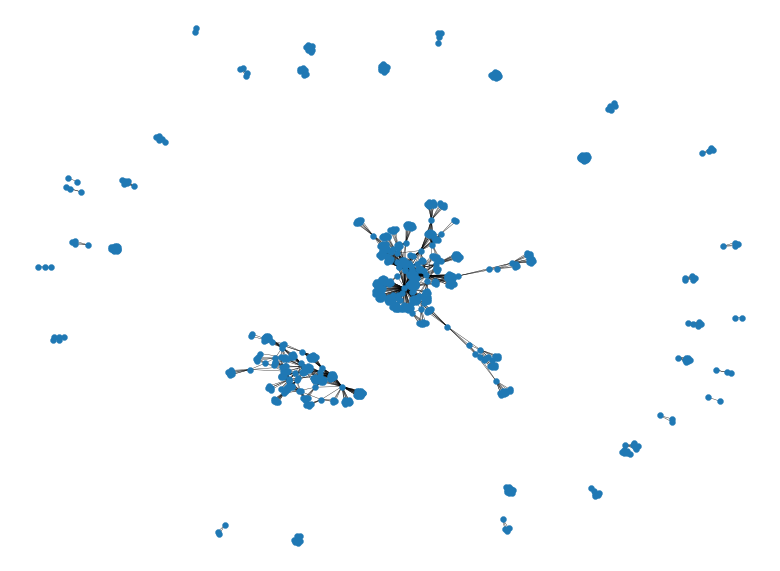

<bound method Graph.subgraph of <networkx.classes.graph.Graph object at 0x7fe0dd88e860>>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(40, 30), dpi=25)
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
# nx.draw_networkx_labels(G,pos)

plt.show()
G.subgraph

In [ ]:
# extract subgraphs
sub_graphs = nx.connected_components(G)

for s in sub_graphs:
  a = list(s)
  if(len(a) > 1):
    print(a)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
len(auth_dict.keys())

747

394


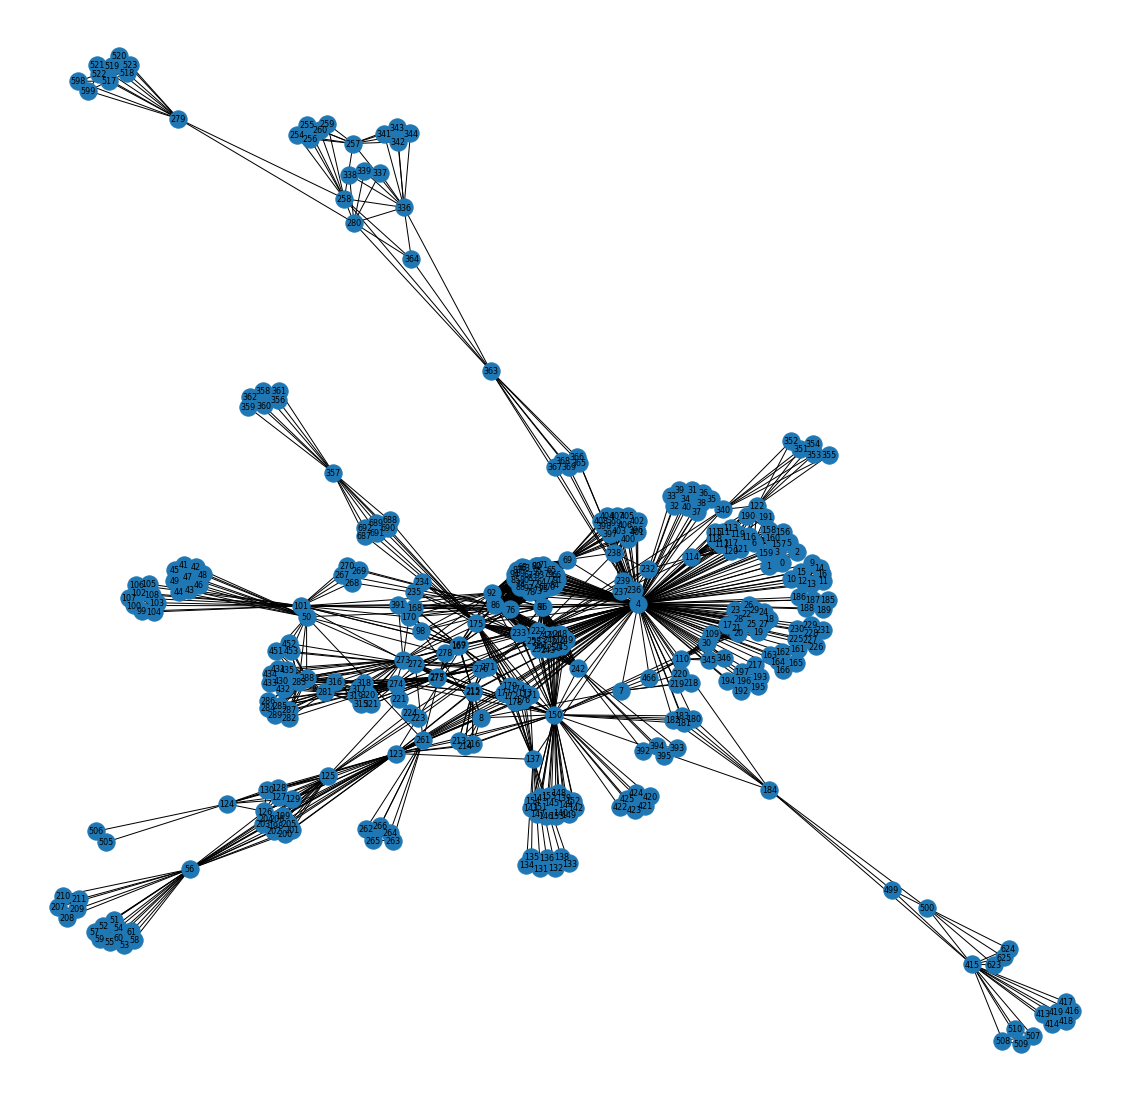

In [ ]:
sub_graphs = nx.connected_components(G)

# fig, ax = plot.subplots(1)
for s in sub_graphs:
  temp = s
  break

print(len(temp))
G1 = G.subgraph(temp)

plt.figure(num=None, figsize=(20, 20))
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(G1)  
nx.draw_networkx_nodes(G1,pos)
nx.draw_networkx_edges(G1,pos)
nx.draw_networkx_labels(G1,pos,font_size=8)
plt.show()

168


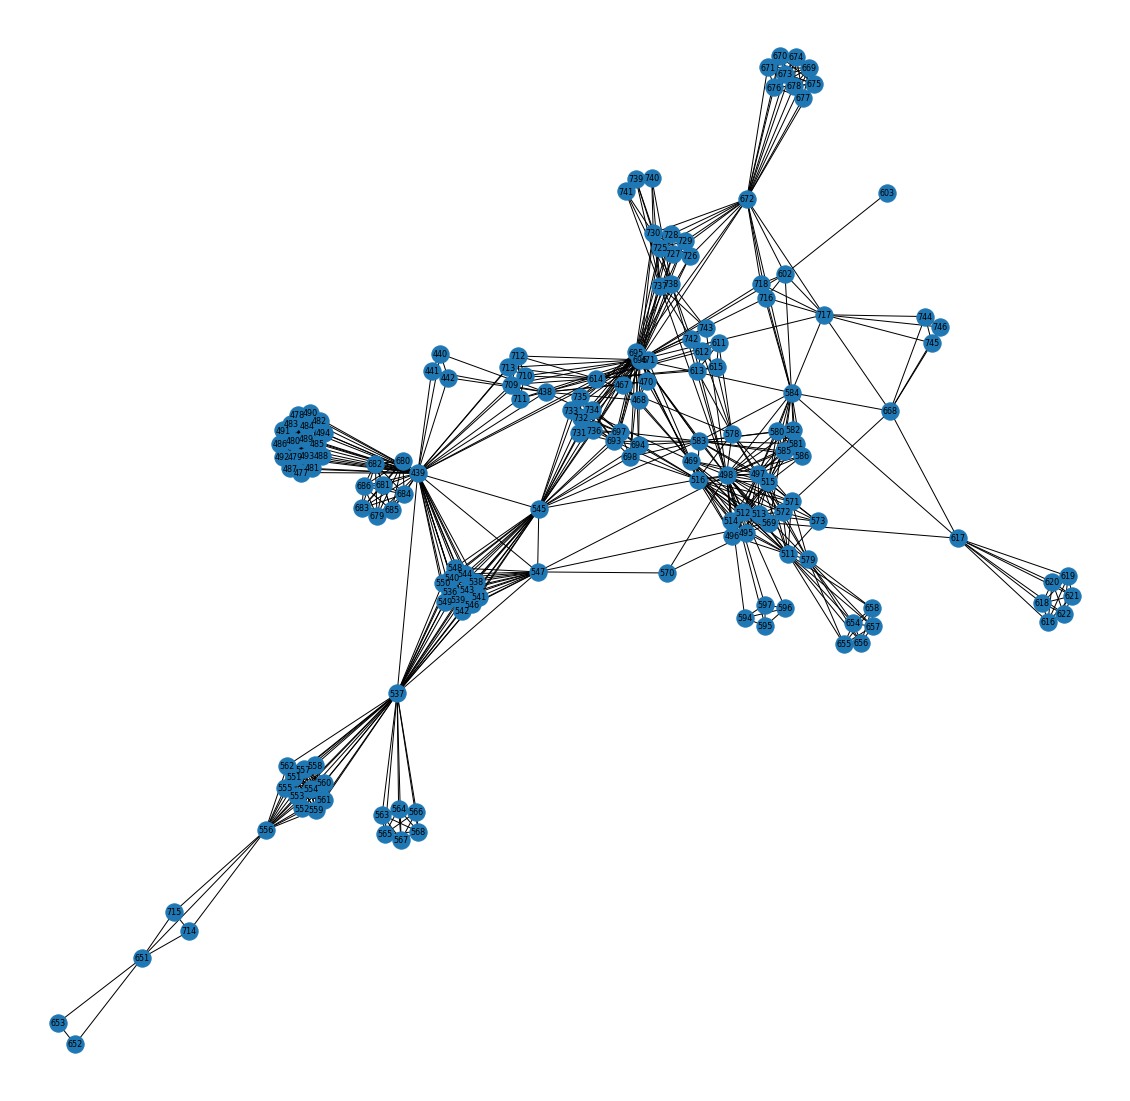

In [ ]:
temp1 = [512, 513, 514, 515, 516, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 578, 579, 580, 581, 582, 583, 584, 585, 586, 594, 595, 596, 597, 602, 603, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 651, 652, 653, 654, 655, 656, 657, 658, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 693, 694, 695, 696, 697, 698, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 438, 439, 440, 441, 442, 467, 468, 469, 470, 471, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 511]
print(len(temp1))

G1 = G.subgraph(temp1)

plt.figure(num=None, figsize=(20, 20))
plt.axis('off')
fig = plt.figure(1)
pos = nx.spring_layout(G1)  
nx.draw_networkx_nodes(G1,pos)
nx.draw_networkx_edges(G1,pos)
nx.draw_networkx_labels(G1,pos,font_size=8)
plt.show()

In [ ]:
# sorted(auth_dict.items(), key = lambda x:x[1])

for item in auth_dict.items():
  if item[1] == 512:
    print(item)
    break

('H. Bale', 512)


In [ ]:
iso = nx.isolates(G)

for s in iso:
  print(s)

In [ ]:
for key in auth_dict.keys():
  if(len(key) < 3):
    print(key)